In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/content/processed.csv')

In [52]:
metrics_by_type = {}
for video_type in df['type'].unique():
  type_df = df[df['type'] == video_type]
  error_enter = np.abs(type_df['processed_enter'] - type_df['enter'])
  error_exit = np.abs(type_df['processed_exit'] - type_df['exit'])


  mae_enter = error_enter.mean()
  mae_exit = error_exit.mean()


  accuracy_enter = (type_df['processed_enter'] == type_df['enter']).mean()
  accuracy_exit = (type_df['processed_exit'] == type_df['exit']).mean()

  corr_enter = np.corrcoef(type_df['enter'], type_df['processed_enter'])[0, 1]
  corr_exit = np.corrcoef(type_df['exit'], type_df['processed_exit'])[0, 1]
  metrics_by_type[video_type] = {
            'MAE_Enter': mae_enter,
            'MAE_Exit': mae_exit,
            'Accuracy_Enter': accuracy_enter,
            'Accuracy_Exit': accuracy_exit,
            'Corr_Enter': corr_enter,
            'Corr_Exit': corr_exit,
            'Error_Enter': error_enter,
            'Error_Exit': error_exit
        }

strong light crowd - 1    
strong light uncrowd - 2  
weak light crowd - 3      
weak light uncrowd - 4    

In [53]:
type_counts = df.groupby('type').size()
print(type_counts)

type
1    100
2    100
3    100
4    100
dtype: int64


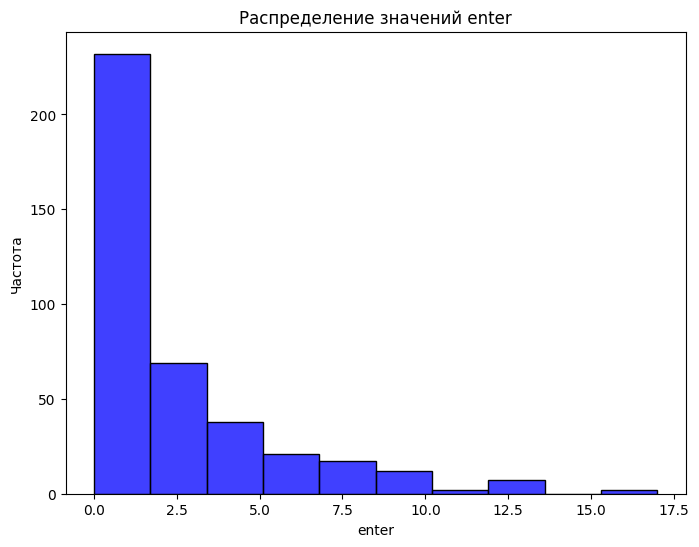

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(df["enter"], bins=10, color="blue")
plt.title("Распределение значений enter")
plt.xlabel("enter")
plt.ylabel("Частота")
plt.show()

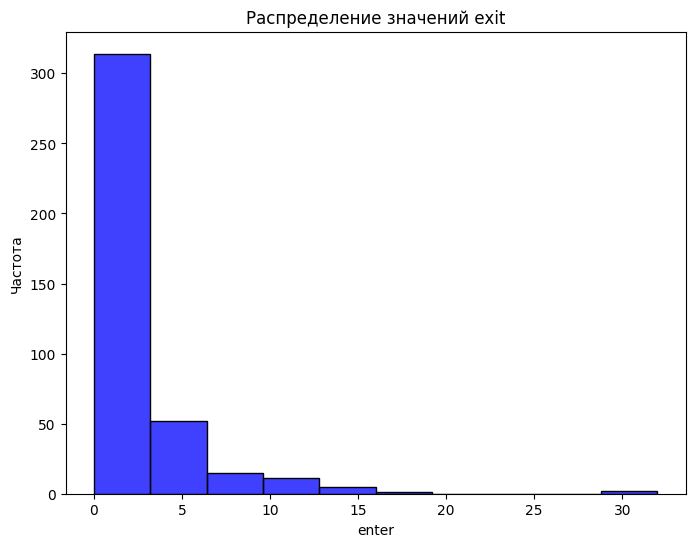

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(df["exit"], bins=10, color="blue")
plt.title("Распределение значений exit")
plt.xlabel("enter")
plt.ylabel("Частота")
plt.show()

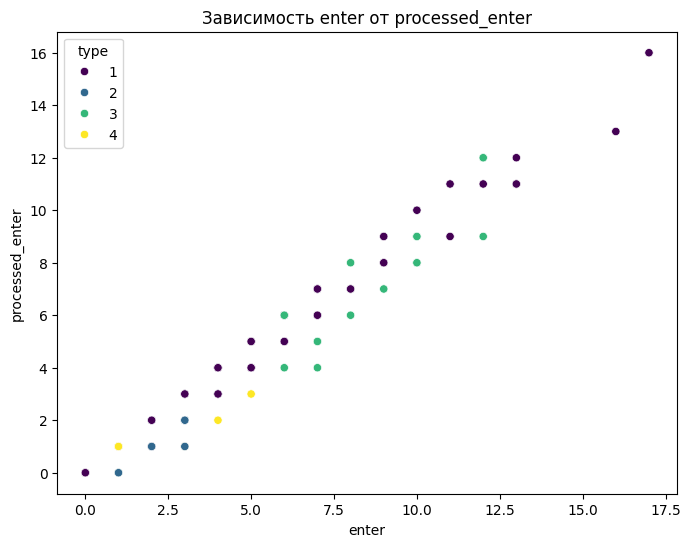

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="enter", y="processed_enter", data=df, hue="type", palette="viridis")
plt.title("Зависимость enter от processed_enter")
plt.xlabel("enter")
plt.ylabel("processed_enter")
plt.show()

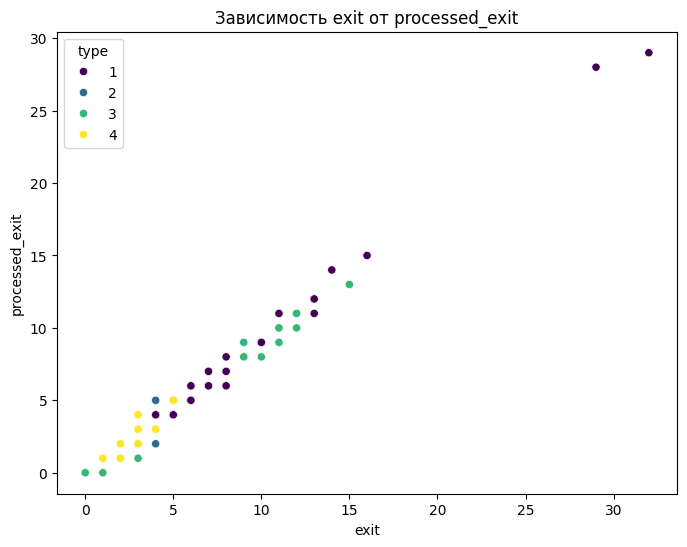

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="exit", y="processed_exit", data=df, hue="type", palette="viridis")
plt.title("Зависимость exit от processed_exit")
plt.xlabel("exit")
plt.ylabel("processed_exit")
plt.show()

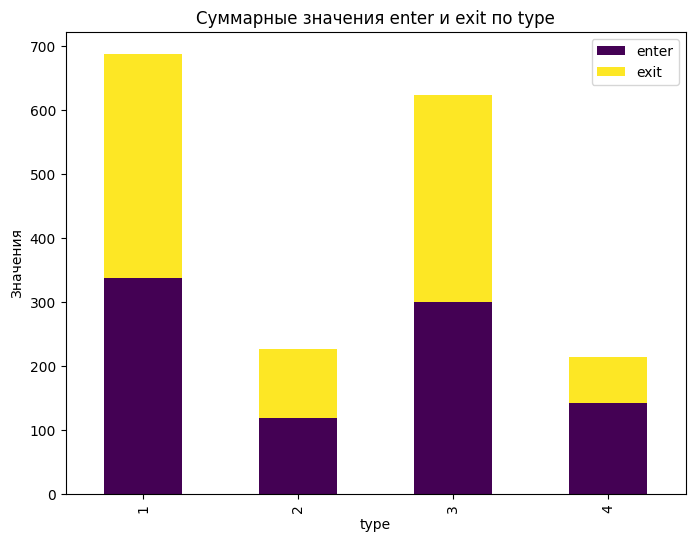

In [100]:
df_grouped = df.groupby("type")[["enter", "exit"]].sum()
df_grouped.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
plt.title("Суммарные значения enter и exit по type")
plt.xlabel("type")
plt.ylabel("Значения")
plt.show()

In [57]:
metrics = metrics_by_type[1]
print(f"Metrics for Video Type {1}:")
print(f"MAE Enter: {metrics['MAE_Enter']:.2f}, Exit: {metrics['MAE_Exit']:.2f}")
print(f"Accuracy Enter: {metrics['Accuracy_Enter']:.2f}, Exit: {metrics['Accuracy_Exit']:.2f}")
print(f"Correlation Enter: {metrics['Corr_Enter']:.2f}, Exit: {metrics['Corr_Exit']:.2f}")


Metrics for Video Type 1:
MAE Enter: 0.30, Exit: 0.24
Accuracy Enter: 0.75, Exit: 0.80
Correlation Enter: 0.99, Exit: 1.00


In [106]:
metrics = metrics_by_type[2]
print(f"Metrics for Video Type {2}:")
print(f"MAE Enter: {metrics['MAE_Enter']:.2f}, Exit: {metrics['MAE_Exit']:.2f}")
print(f"Accuracy Enter: {metrics['Accuracy_Enter']:.2f}, Exit: {metrics['Accuracy_Exit']:.2f}")
print(f"Correlation Enter: {metrics['Corr_Enter']:.2f}, Exit: {metrics['Corr_Exit']:.2f}")


Metrics for Video Type 2:
MAE Enter: 0.12, Exit: 0.06
Accuracy Enter: 0.89, Exit: 0.95
Correlation Enter: 0.97, Exit: 0.98


In [108]:
metrics = metrics_by_type[3]
print(f"Metrics for Video Type {3}:")
print(f"MAE Enter: {metrics['MAE_Enter']:.2f}, Exit: {metrics['MAE_Exit']:.2f}")
print(f"Accuracy Enter: {metrics['Accuracy_Enter']:.2f}, Exit: {metrics['Accuracy_Exit']:.2f}")
print(f"Correlation Enter: {metrics['Corr_Enter']:.2f}, Exit: {metrics['Corr_Exit']:.2f}")


Metrics for Video Type 3:
MAE Enter: 0.40, Exit: 0.31
Accuracy Enter: 0.71, Exit: 0.74
Correlation Enter: 0.99, Exit: 0.99


In [110]:
metrics = metrics_by_type[4]
print(f"Metrics for Video Type {4}:")
print(f"MAE Enter: {metrics['MAE_Enter']:.2f}, Exit: {metrics['MAE_Exit']:.2f}")
print(f"Accuracy Enter: {metrics['Accuracy_Enter']:.2f}, Exit: {metrics['Accuracy_Exit']:.2f}")
print(f"Correlation Enter: {metrics['Corr_Enter']:.2f}, Exit: {metrics['Corr_Exit']:.2f}")


Metrics for Video Type 4:
MAE Enter: 0.15, Exit: 0.07
Accuracy Enter: 0.88, Exit: 0.93
Correlation Enter: 0.96, Exit: 0.97
